# ***Loan Default Classification - Logistic Regression***

***Tools & Pre-requesites:***

1. Core - Python & Machine Learning (Logistics Classification Algorithm)
2. IDE - Jupyter Notebook, Google Colab, Etc..,
3. Loan Defaulter - Dataset (Taken from the Kaggle.com)
4. Python.org - Download Python (latest version 3.11.3)
5. pypi.org - Python Packages.

****Classification Model****

**@ Install required Packages**

In [ ]:
!pip install pandas                  # Data Manipulation & Data Defintion
!pip install numpy                   # Mathmatical Operations
!pip install matplotlib              # Data Visualization
!pip install seaborn                 # Data Visualization
!pip install sklearn                 # Machine Learning Algorithm Package

**@ Import Packages**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from matplotlib.cm import get_cmap
from sklearn import preprocessing
from random import sample
from sklearn.preprocessing import OrdinalEncoder
import warnings # 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

**@ Import the Dataset**

In [150]:
df = pd.read_csv('/content/drive/MyDrive/Loan Default.csv') # Imported the Dataset as df.

**@ Data Defintion**

In [80]:
df.info()          # Data Info or Description.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ MB


In [81]:
print('Total_Columns: ', len(df.columns),'\n')
print(df.columns,'\n')
print('Shape :',df.shape)           # Data Size or Length (Row, Column)

Total_Columns:  10 

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income'],
      dtype='object') 

Shape : (32581, 10)


In [82]:
df.head(5)         # Dataset First 5 Lines. 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [83]:
df.tail(5)         # Dataset Last 5 Lines.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15


In [84]:
df.describe()       # Data Summary

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


**@ Data Visualization**

###### ***Single Variate Analysis***

In [85]:
df.isna().sum()    # Check for the Null's

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         895
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3116
loan_status                 0
loan_percent_income         0
dtype: int64

***Null Treatment: ---  Found a Null's in the "person_emp_length" and "loan_int_rate"***

In [86]:
# Replace the Null values with it's Mean.

df.iloc[:,7] = df.iloc[:,7].fillna(df.iloc[:,7].mean())
df.iloc[:,3] = df.iloc[:,3].fillna(df.iloc[:,3].mean())
df.isna().sum()    # Check for the Null's

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
loan_status              0
loan_percent_income      0
dtype: int64

Skewness: 
person_emp_length : 2.651118391390236
loan_int_rate : 0.21929952450406942


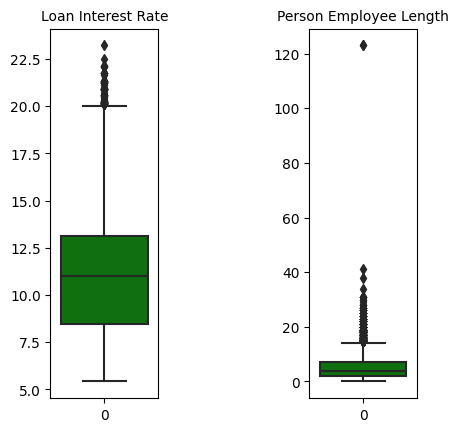

In [87]:
# Check for Anamolies

# Loan Interest Rate
plt.subplot(1,4,1)
sns.boxplot(df.iloc[:,7], color = 'green')
plt.title("Loan Interest Rate", fontsize = 10)

# Person Employee Experiance
plt.subplot(1,4,3)
sns.boxplot(df.iloc[:,3], color = 'green')
plt.title("Person Employee Length", fontsize = 10)

# Skewness defines a measure of the asymmetry of a distribution
print('Skewness: ')
print(df.iloc[:,3].name,":", df.iloc[:,3].skew())
print(df.iloc[:,7].name,":", df.iloc[:,7].skew())

From the above Plots found that, **"Loan Interest Rate"** Attribute is in Linear. But for the **"Person Employee Length or Experiance"** is having a few **anamolies**, as we see in the above plot, a Few records have been at 120.

***Anamoly Treatment - Person Employee Length***

In [88]:
# Replacing the Anamolies with its 90% quantile value.

df.iloc[:,3] = np.where(df.iloc[:,3] > df.iloc[:,3].quantile(0.90), df.iloc[:,3].quantile(0.90), df.iloc[:,3])
df.iloc[:,3].describe()

count    32581.000000
mean         4.447708
std          3.181802
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: person_emp_length, dtype: float64

In [89]:
# Converting the Categorical Text values into Numerical Values using Ordinal Encoder.

ord_enc = OrdinalEncoder()
df[['person_home_ownership', 'loan_intent', 'loan_grade']] = ord_enc.fit_transform(df[['person_home_ownership', 'loan_intent', 'loan_grade']])
df[['person_home_ownership', 'loan_intent', 'loan_grade']].head(11)
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,1.676222,4.447708,2.533839,1.218195,9589.371106,11.011695,0.218164,0.170203
std,6.348078,6.198312e+04,1.433116,3.181802,1.731182,1.166336,6322.086646,3.081605,0.413006,0.106782
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.850000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,8.490000,0.000000,0.090000
50%,26.000000,5.500000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,11.011695,0.000000,0.150000
75%,30.000000,7.920000e+04,3.000000,7.000000,4.000000,2.000000,12200.000000,13.110000,0.000000,0.230000
max,144.000000,6.000000e+06,3.000000,10.000000,5.000000,6.000000,35000.000000,23.220000,1.000000,0.830000


In [90]:
# Unique Values in the individual Fields.

def unique(x):
    return len(df[x].unique())

number_unique_vals = {x: unique(x) for x in df.columns}
number_unique_vals

{'person_age': 58,
 'person_income': 4295,
 'person_home_ownership': 4,
 'person_emp_length': 12,
 'loan_intent': 6,
 'loan_grade': 7,
 'loan_amnt': 753,
 'loan_int_rate': 349,
 'loan_status': 2,
 'loan_percent_income': 77}

Skewness: 
person_emp_length : 0.308977471910724


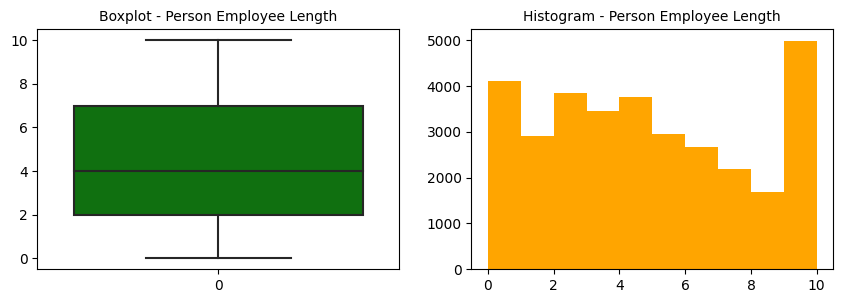

In [91]:
# Person Employee Experiance
plt.subplot(2,4,1)
sns.boxplot(df.iloc[:,3], color = 'green')
plt.title("Boxplot - Person Employee Length", fontsize = 10)

plt.subplot(2,4,2)
plt.hist(df.iloc[:,3], color = 'orange')
plt.title("Histogram - Person Employee Length", fontsize = 10)
plt.subplots_adjust(left=1.4, bottom=0.1, right=4, top=1.2)

print('Skewness: ')
print(df.iloc[:,3].name,":", df.iloc[:,3].skew())

###### ***Multi Variate Analysis***

CORRELATION PLOT

In [92]:
plt.figure(figsize = (10,8))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.heatmap(df.corr(),annot = True)
#plt.show()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
person_age,1.00,0.17,-0.03,0.08,0.04,0.01,0.05,0.01,-0.02,-0.04
person_income,0.17,1.00,-0.20,0.13,0.00,-0.00,0.27,0.00,-0.14,-0.25
person_home_ownership,-0.03,-0.20,1.00,-0.25,0.01,0.12,-0.13,0.13,0.21,0.14
person_emp_length,0.08,0.13,-0.25,1.00,0.01,-0.05,0.11,-0.06,-0.09,-0.06
loan_intent,0.04,0.00,0.01,0.01,1.00,-0.01,-0.00,-0.00,-0.07,0.00
loan_grade,0.01,-0.00,0.12,-0.05,-0.01,1.00,0.15,0.89,0.37,0.12
loan_amnt,0.05,0.27,-0.13,0.11,-0.00,0.15,1.00,0.14,0.11,0.57
loan_int_rate,0.01,0.00,0.13,-0.06,-0.00,0.89,0.14,1.00,0.32,0.11
loan_status,-0.02,-0.14,0.21,-0.09,-0.07,0.37,0.11,0.32,1.00,0.38
loan_percent_income,-0.04,-0.25,0.14,-0.06,0.00,0.12,0.57,0.11,0.38,1.00


<Figure size 1000x800 with 0 Axes>

**@ Data Modelling**

In [94]:
# Separation of Dependent Variable and Independent Variables.

X = df.loc[:,df.columns != 'loan_status']
Y = df.loc[:,df.columns == 'loan_status']

In [97]:
# Train and Test Data Split with the ratio of 80% : 20%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (26064, 9)
x_test shape : (6517, 9)
y_train shape : (26064, 1)
y_test shape : (6517, 1)


In [110]:
# Model Fitting in the Algorithm

model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [103]:
# Train and Test Accuracy 

print("Showing Performance Metrics for Logistic Regression\n")

print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

Showing Performance Metrics for Logistic Regression

Training Accuracy: 0.8360190300798036
Testing Accuracy: 0.8287555623753261


In [143]:
# Confusion Matrix 

labels = [0, 1]
cm = confusion_matrix(y_test, predicted, labels=labels)
print(cm)

[[4834  238]
 [ 878  567]]


1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [125]:
# Precision, Recall & F1 Scores.

print('Precision, Recall and f-1 Scores for Logistic Regression\n')
print(classification_report(y_test, predicted))

Precision, Recall and f-1 Scores for Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5072
           1       0.70      0.39      0.50      1445

    accuracy                           0.83      6517
   macro avg       0.78      0.67      0.70      6517
weighted avg       0.81      0.83      0.81      6517



The AUROC is a way to measure how robust your model is across decision thresholds. It is the area under the plot of the true positive rate versus the false positive rate. The true positive rate (TPR) is (true positives)/(true positives + false negatives). The false positive rate is the (false positive)/(false positive + true negative)

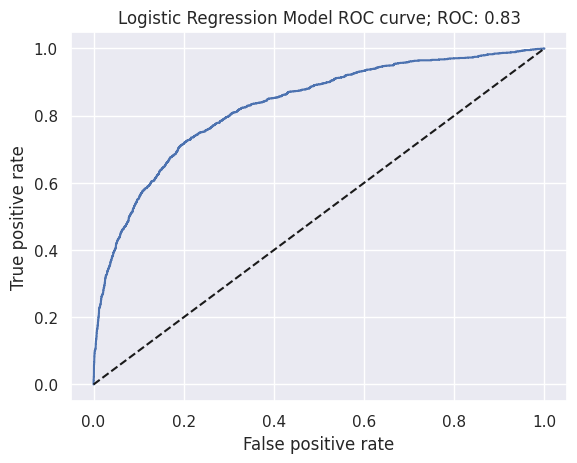

In [151]:
# AUROC [Area Under Receiver-Operator Curve]

y_pred_proba = model.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
ROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.title(f'Logistic Regression Model ROC curve; ROC: {ROC}');
plt.show()

***As per the Loan Defaulter Classification result, We got 83% Test Accuracy to define the test results. So, our results for the predictions are Approximately 83% Accurate as per the data.***